# Import

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import plotly.express as px
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.compose import ColumnTransformer
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Import file

In [197]:
immo_df = pd.read_csv("data/immo.csv")
immo_df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


# Data exploration

## First data exploration

In [198]:
immo_df.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [199]:
immo_df.isna().sum()

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [200]:
immo_df.shape

(16512, 11)

In [201]:
immo_df= immo_df.fillna(0)
immo_df.isna().sum()

Unnamed: 0            0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [202]:
immo_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


## First data visualisation

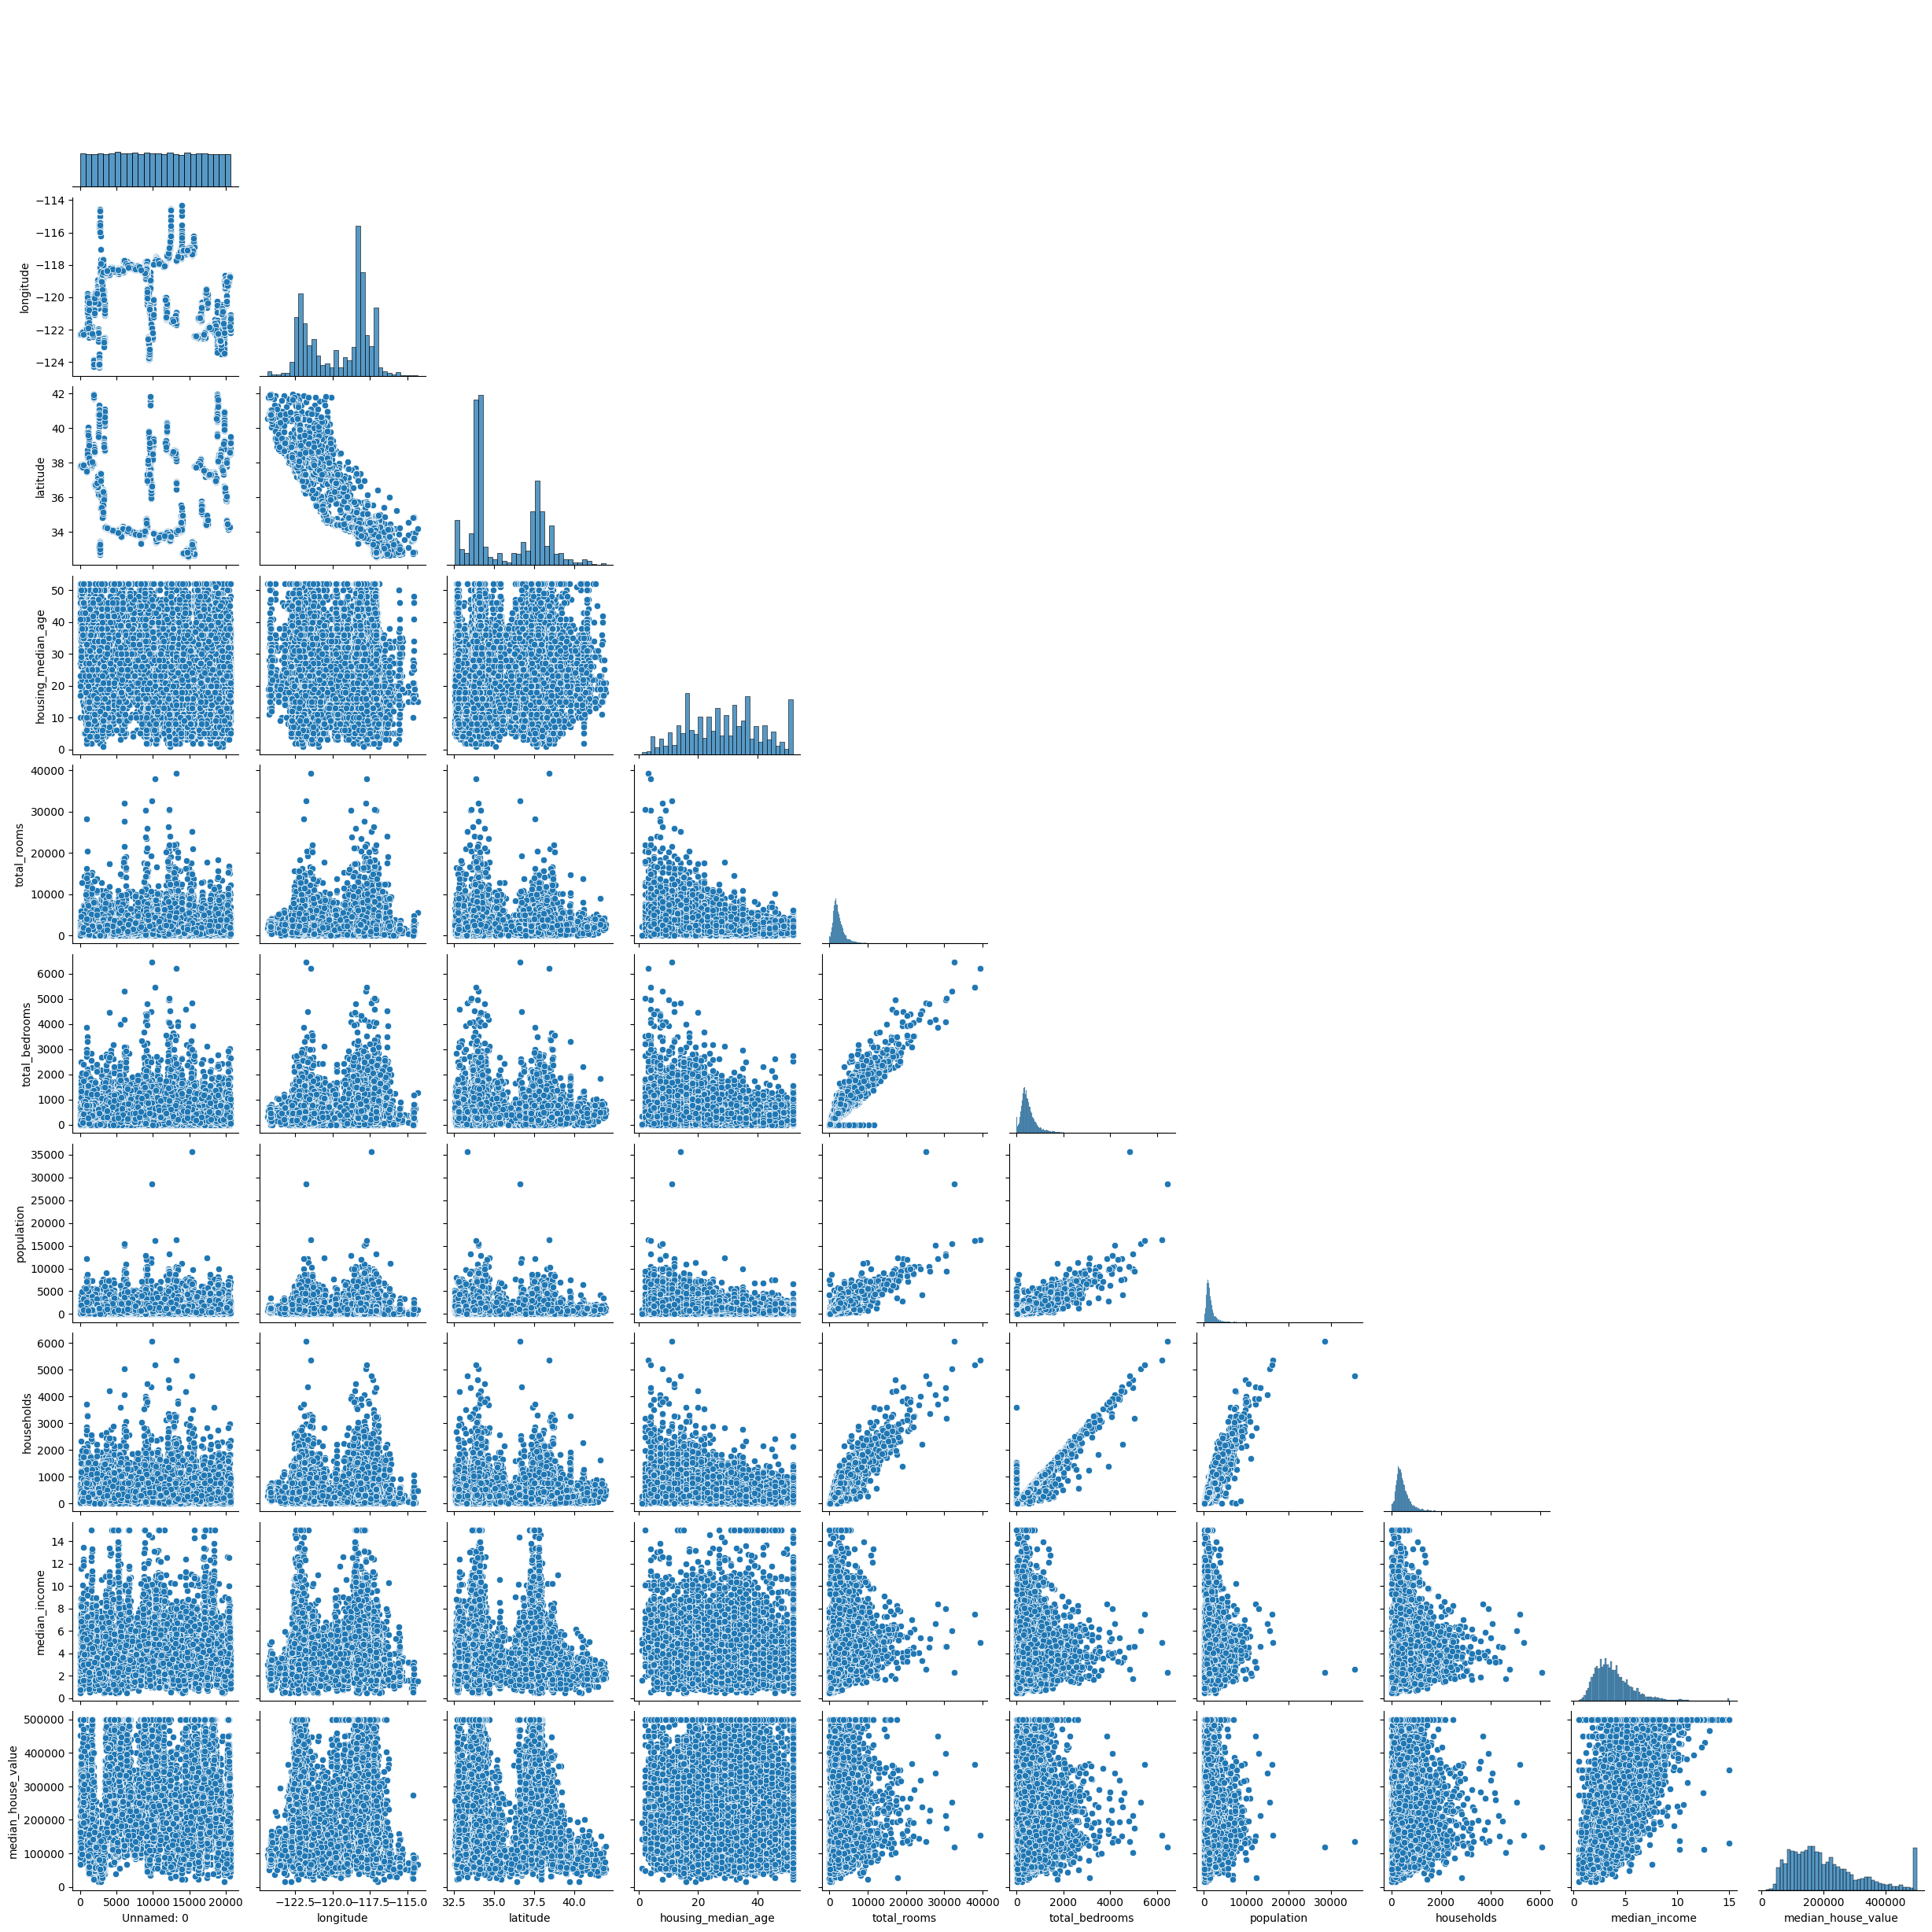

In [203]:
sns.pairplot(immo_df,corner= True)
plt.show()

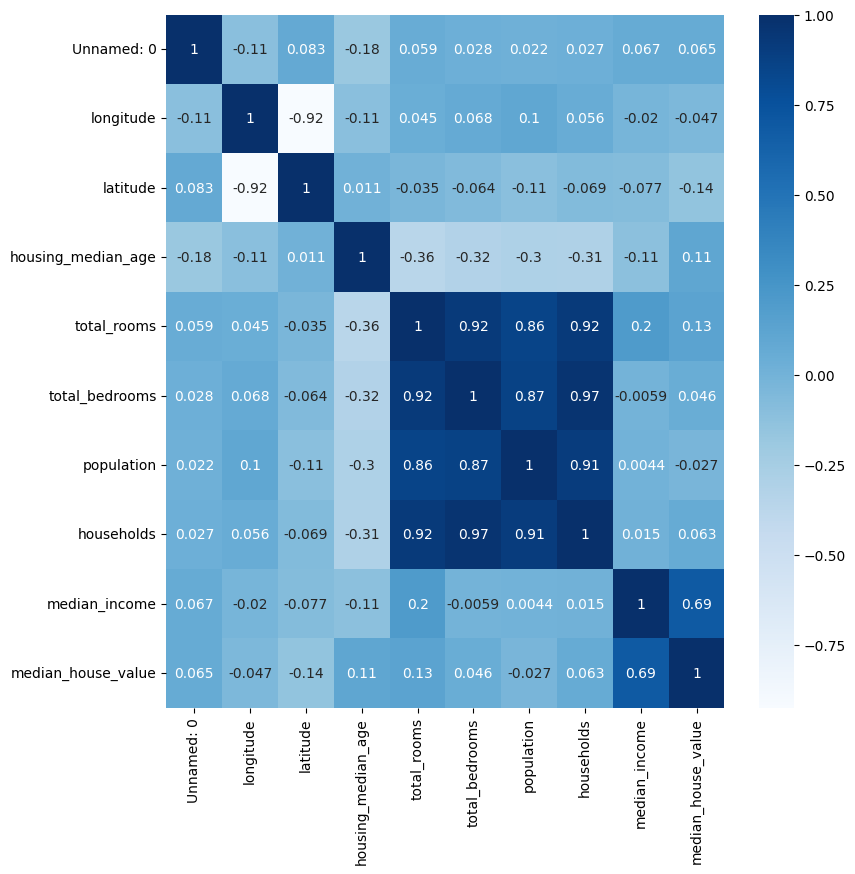

In [204]:
plt.figure(figsize=(9,9))
cor = immo_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

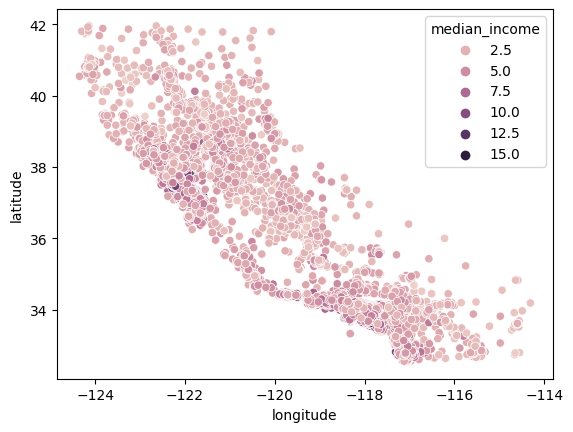

In [205]:
sns.scatterplot(data = immo_df, x = "longitude",y="latitude", hue = "median_income")
plt.show()

In [206]:
fig = px.scatter_mapbox(immo_df, lat="latitude", lon="longitude", color = "median_house_value",zoom=4.1, mapbox_style="carto-positron")
fig.update_layout(
    showlegend=False,
    font={'size': 15},
    title={'text': '<b>Median house value in California</b>', 'font': {'size': 20}},
    title_x = 0.45,
)
fig.show()

# First iteration : Baseline

In [207]:
first_it = immo_df.to_pickle("data/first_iteration.pkl")

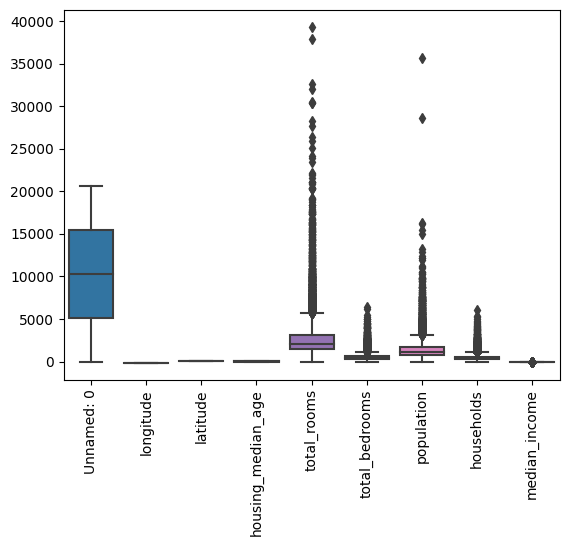

In [208]:
sns.boxplot(data = immo_df.drop("median_house_value",axis=1))
plt.xticks(rotation=90)
plt.show()

# Second iteration : Outliers

In [209]:
treshold = 3
immo_without_outliers =immo_df[(np.abs(stats.zscore(immo_df['total_rooms'])) < treshold)] 
immo_without_outliers =immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['total_bedrooms'])) < treshold)]
immo_without_outliers =immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['population'])) < treshold)]
immo_without_outliers =immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['households'])) < treshold)]
immo_without_outliers =immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['median_income'])) < treshold)]

In [210]:
immo_without_outliers.shape

(15262, 11)

Choix de 3 et pas 2 : vire 2000 de plus

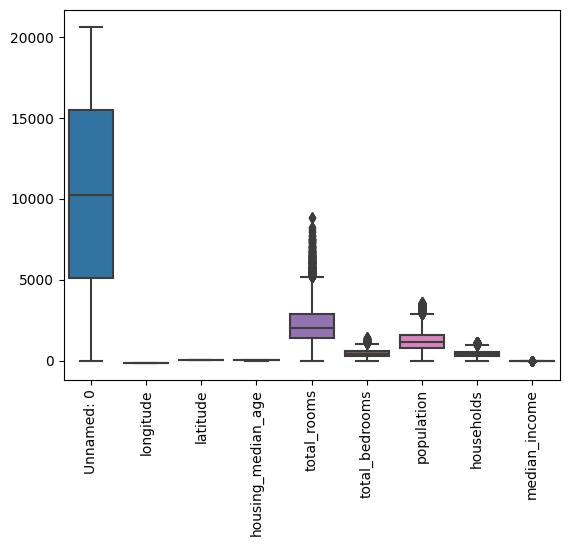

In [211]:
sns.boxplot(data = immo_without_outliers.drop("median_house_value",axis=1))
plt.xticks(rotation=90)
plt.show()

In [212]:
second_it = immo_without_outliers.to_pickle("data/second_iteration.pkl")

# Third iteration : Median imputation

pas concluant sans outliers

In [213]:
immo_df_2 = immo_df
immo_df_3 = immo_df
immo_df_4 = immo_df
imputer = SimpleImputer(strategy='median', missing_values=0)
imputer = imputer.fit(immo_df_2[['total_bedrooms']])
immo_df_2[['total_bedrooms']] = imputer.transform(immo_df_2[['total_bedrooms']])

In [214]:
third_it = immo_df_2.to_pickle("data/third_iteration.pkl")

# Fourth iteration : Mean imputation

In [215]:
imputer = SimpleImputer(strategy='mean', missing_values=0)
imputer = imputer.fit(immo_df_3[['total_bedrooms']])
immo_df_3[['total_bedrooms']] = imputer.transform(immo_df_3[['total_bedrooms']])

In [216]:
fourth_it = immo_df_3.to_pickle("data/fourth_iteration.pkl")

# Fifth iteration : imputation iterative

In [217]:
immo_df_4 = immo_df_4.drop("ocean_proximity",axis=1)

In [218]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

iter_imp = IterativeImputer(random_state=0)
iter_imputed = iter_imp.fit_transform(immo_df_4)
df_iter_imputed = pd.DataFrame(iter_imputed, columns=immo_df_4.columns)

In [219]:
seventh_it = df_iter_imputed.to_pickle("data/seventh_iteration.pkl")

# Sixth iteration : ocean_proximity encoding

In [220]:
immo_df["ocean_proximity"].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [221]:
enc = OneHotEncoder(sparse=False).fit(immo_df[["ocean_proximity"]])
encoded = enc.transform(immo_df[["ocean_proximity"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
immo_df_one_hot = pd.concat([immo_df,encoded_df],axis=1)
immo_df_one_hot = immo_df_one_hot.drop("ocean_proximity",axis=1)
immo_df_one_hot

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,0.0,1.0,0.0,0.0,0.0
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,1.0,0.0,0.0,0.0,0.0
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,0.0,1.0,0.0,0.0,0.0
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,1.0,0.0,0.0,0.0,0.0
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,0.0,1.0,0.0,0.0,0.0
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,0.0,0.0,0.0,1.0,0.0
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,0.0,1.0,0.0,0.0,0.0
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,1.0,0.0,0.0,0.0,0.0


In [222]:
sixth_it = immo_df_one_hot.to_pickle("data/sixth_iteration.pkl")

# Seventh iteration : Normalization

In [223]:
immo_df_without_ocean = immo_df.drop(["ocean_proximity","median_house_value"],axis=1)
scaler = StandardScaler()
print(scaler.fit(immo_df_without_ocean))
scale_immo = scaler.transform(immo_df_without_ocean)
scale_immo_df = pd.DataFrame(scale_immo,columns=immo_df_without_ocean.columns)
scale_immo_df.head()

StandardScaler()


,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.384010,-0.137635,0.534564,-1.795939,-0.357368,-0.154134,-0.032827,-0.218173,-1.258403
1,0.051247,0.879836,-0.909979,-1.637178,-0.276515,-0.447238,-0.494784,-0.417841,1.610623
2,-1.312987,-0.312201,0.455091,-0.287715,-0.799127,-0.766343,-0.435204,-0.744572,-1.220425
3,-1.011731,0.620480,-0.713633,0.188566,-0.913406,-0.730887,-0.723603,-0.710862,-1.233736
4,1.051114,-0.830911,1.011403,-0.605236,-0.326201,-0.390508,-0.263373,-0.334862,0.114837


In [224]:
scale_immo_df["median_house_value"]= immo_df["median_house_value"]
scale_immo_df.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.384010,-0.137635,0.534564,-1.795939,-0.357368,-0.154134,-0.032827,-0.218173,-1.258403,72000.0
1,0.051247,0.879836,-0.909979,-1.637178,-0.276515,-0.447238,-0.494784,-0.417841,1.610623,274100.0
2,-1.312987,-0.312201,0.455091,-0.287715,-0.799127,-0.766343,-0.435204,-0.744572,-1.220425,58300.0
3,-1.011731,0.620480,-0.713633,0.188566,-0.913406,-0.730887,-0.723603,-0.710862,-1.233736,200000.0
4,1.051114,-0.830911,1.011403,-0.605236,-0.326201,-0.390508,-0.263373,-0.334862,0.114837,117900.0


In [225]:
scale_immo_encoded = pd.concat([scale_immo_df,encoded_df],axis=1)

In [226]:
scale_immo_encoded

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.384010,-0.137635,0.534564,-1.795939,-0.357368,-0.154134,-0.032827,-0.218173,-1.258403,72000.0,0.0,1.0,0.0,0.0,0.0
1,0.051247,0.879836,-0.909979,-1.637178,-0.276515,-0.447238,-0.494784,-0.417841,1.610623,274100.0,1.0,0.0,0.0,0.0,0.0
2,-1.312987,-0.312201,0.455091,-0.287715,-0.799127,-0.766343,-0.435204,-0.744572,-1.220425,58300.0,0.0,1.0,0.0,0.0,0.0
3,-1.011731,0.620480,-0.713633,0.188566,-0.913406,-0.730887,-0.723603,-0.710862,-1.233736,200000.0,1.0,0.0,0.0,0.0,0.0
4,1.051114,-0.830911,1.011403,-0.605236,-0.326201,-0.390508,-0.263373,-0.334862,0.114837,117900.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-1.547765,-1.165080,1.852884,-0.684616,-0.532626,-0.615063,-0.595810,-0.651220,-0.423409,93800.0,0.0,1.0,0.0,0.0,0.0
16508,1.447795,-1.339646,1.161000,1.617410,-0.126100,-0.080858,-0.262510,-0.111856,-0.660681,103100.0,0.0,0.0,0.0,1.0,0.0
16509,0.252870,-0.825923,1.539666,-0.763996,-0.051119,-0.182499,-0.197750,-0.187056,0.333675,192600.0,0.0,1.0,0.0,0.0,0.0
16510,-0.615723,0.710257,-0.685584,0.823608,0.059547,0.713359,0.959301,0.704970,-0.680911,153500.0,1.0,0.0,0.0,0.0,0.0


In [237]:
seventh_it = scale_immo_encoded.to_pickle("data/seventh_iteration.pkl")

# Eighth iteration : Feature selection

# iteration

## Statistics

### Unscaled data

In [228]:
immo_without_outliers = immo_df[(np.abs(stats.zscore(immo_df['total_rooms'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['longitude'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['latitude'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['housing_median_age'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['total_rooms'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['total_bedrooms'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['population'])) < treshold)]
immo_without_outliers = immo_without_outliers[(np.abs(stats.zscore(immo_without_outliers['households'])) < treshold)]

In [229]:
best_columns = "+".join(['longitude', 'latitude', 'housing_median_age',"total_rooms","total_bedrooms","population","households","median_income","ocean_proximity"])
model_patsy = ols(f'median_house_value ~ {best_columns}', data=immo_df).fit()

anova_table = sm.stats.anova_lm(model_patsy, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
ocean_proximity,2.223743e+12,4.0,118.492192,7.832257e-100
longitude,2.468527e+12,1.0,526.142126,1.204826e-114
latitude,2.330768e+12,1.0,496.780208,1.892892e-108
housing_median_age,2.174532e+12,1.0,463.480085,2.080941e-101
total_rooms,1.526435e+11,1.0,32.534454,1.191046e-08
total_bedrooms,5.236613e+11,1.0,111.613246,5.258167e-26
population,5.250476e+12,1.0,1119.087190,1.867555e-237
households,5.768266e+11,1.0,122.944901,1.807419e-28
median_income,5.095213e+13,1.0,10859.943534,0.000000e+00
Residual,7.740917e+13,16499.0,NaN,NaN


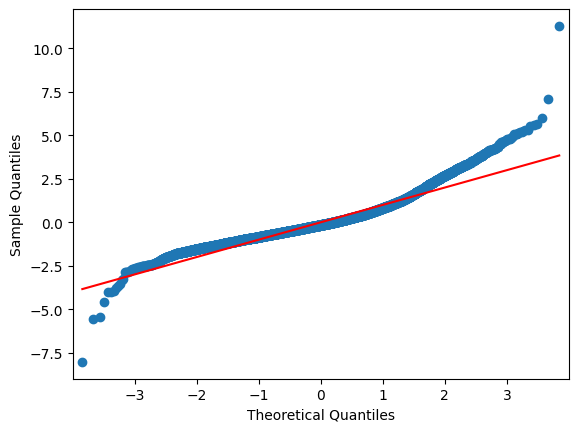

In [230]:
# Plot
pplot = sm.ProbPlot(model_patsy.resid, fit = True)
pplot.qqplot(line = 's')
plt.show()

In [231]:
stats.shapiro(model_patsy.resid)

/home/nais/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/scipy/stats/_morestats.py:1761: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9256429076194763, pvalue=0.0)

In [232]:
shapiro_test = stats.shapiro(immo_df_without_ocean)
shapiro_test

ShapiroResult(statistic=0.5041980743408203, pvalue=0.0)

Homogeneity of Variances using Lavene's test
Null Hypothesis(H0) - Homogenous Variance
Alternate Hypothesis(HA) - Non Homogenous variance

- visualisation de données autre 
- catégories pour l'ocean 
- anova
- MI
- Khi 2 
- modèle 
- créer des features

modifier les données en fonction de l'inférence

In [233]:
# fifth_it = inf_df.to_pickle("data/fifth_iteration.pkl")

# iteration

## Ocean_proximity encoding

In [234]:
immo_df.shape

(16512, 11)

In [235]:
# immo_df = immo_df["ocean_proximity"].replace({})

In [236]:
# second_it = immo_df.to_pickle("data/second_iteration")